In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'ch10/building.tif'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    print(f"Error: Unable to load image at {image_path}")
    exit()



In [32]:
## PARAMS
gaussian_kernel_size = 7
gaussian_var = 1.5

Th= 150
Tl = 40

In [33]:
# Convert the image to grayscale (common for edge detection tasks)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing
# (kernel size must be positive and odd, e.g., (5, 5))
smoothed_image = cv2.GaussianBlur(gray_image, (gaussian_kernel_size, gaussian_kernel_size), gaussian_var)  # Sigma = 1.0

In [34]:
sobel_x =  cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)  # X direction
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)  # Y direction
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_angle = np.arctan2(sobel_y, sobel_x)

# Normalize the result for better visualization
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)
# sobel_angle = cv2.convertScaleAbs(sobel_angle)

In [35]:

def nonmaxima_supression(sobel_magnitude, sobel_angle):
    
    
    dirs = [(0,1),(1,1),(1,0),(-1,1)]
    
    result = sobel_magnitude.copy()
    
    sobel_angle_deg = np.rad2deg((sobel_angle.copy()+np.pi))
    for x in range(sobel_angle_deg.shape[0]):
        for y in range(sobel_angle_deg.shape[1]):
            for i in range(8):
                l , h = i*(360/8) - (360/16) , i*(360/8) + (360/16)
                if sobel_angle_deg[x,y]>= l and sobel_angle[x,y]<= h:
                    dirx,diry =  dirs[i]
               
                    
                    K = sobel_magnitude[x,y]
                    
                    dir1val = sobel_magnitude[np.clip(x+dirx,a_min=0,a_max=sobel_magnitude.shape[0]-1),np.clip(y+diry,a_min=0,a_max=sobel_magnitude.shape[1]-1)]
                    dir2val = sobel_magnitude[np.clip(x-dirx,a_min=0,a_max=sobel_magnitude.shape[0]-1),np.clip(y-diry,a_min=0,a_max=sobel_magnitude.shape[1]-1)]
                    
                    if K < dir1val or K < dir2val:
                        result[x,y]=0
                    else :
                        result[x,y]=K
                    break
    
    return result
                    
                    

    

In [36]:
nonmaxima_suppress = nonmaxima_supression(sobel_magnitude,sobel_angle)

In [37]:
def thresholding(nonmaxima_suppress,Tl,Th):


    Gnl = nonmaxima_suppress > Tl
    Ghl = nonmaxima_suppress > Th

    Gnl = Gnl & ( ~Ghl)
    
    result = Ghl.copy()
    neighbors = [(1,0),(0,1),(1,1),(-1,1)]
    for x in range(Ghl.shape[0]):
        for y in range(Ghl.shape[1]):
            

            if Ghl[x,y]==True:
                for n in neighbors:
                    dirx=n[0]
                    diry=n[1]
                    
                    x1,y1 = np.clip(x+dirx,a_min=0,a_max=Gnl.shape[0]-1),np.clip(y+diry,a_min=0,a_max=Gnl.shape[1]-1)
                    x2,y2 = np.clip(x-dirx,a_min=0,a_max=Gnl.shape[0]-1),np.clip(y-diry,a_min=0,a_max=Gnl.shape[1]-1)
                    result[x1,y1] = Gnl[x1,y1]
                    result[x2,y2] = Gnl[x2,y2]
                    result[x,y] = Ghl[x,y]
                    
    
    return result,Ghl,Gnl
                

                


In [38]:
print(nonmaxima_suppress.max())

255


In [39]:
canny , Ghl , Gnl = thresholding(nonmaxima_suppress,Tl,Th)

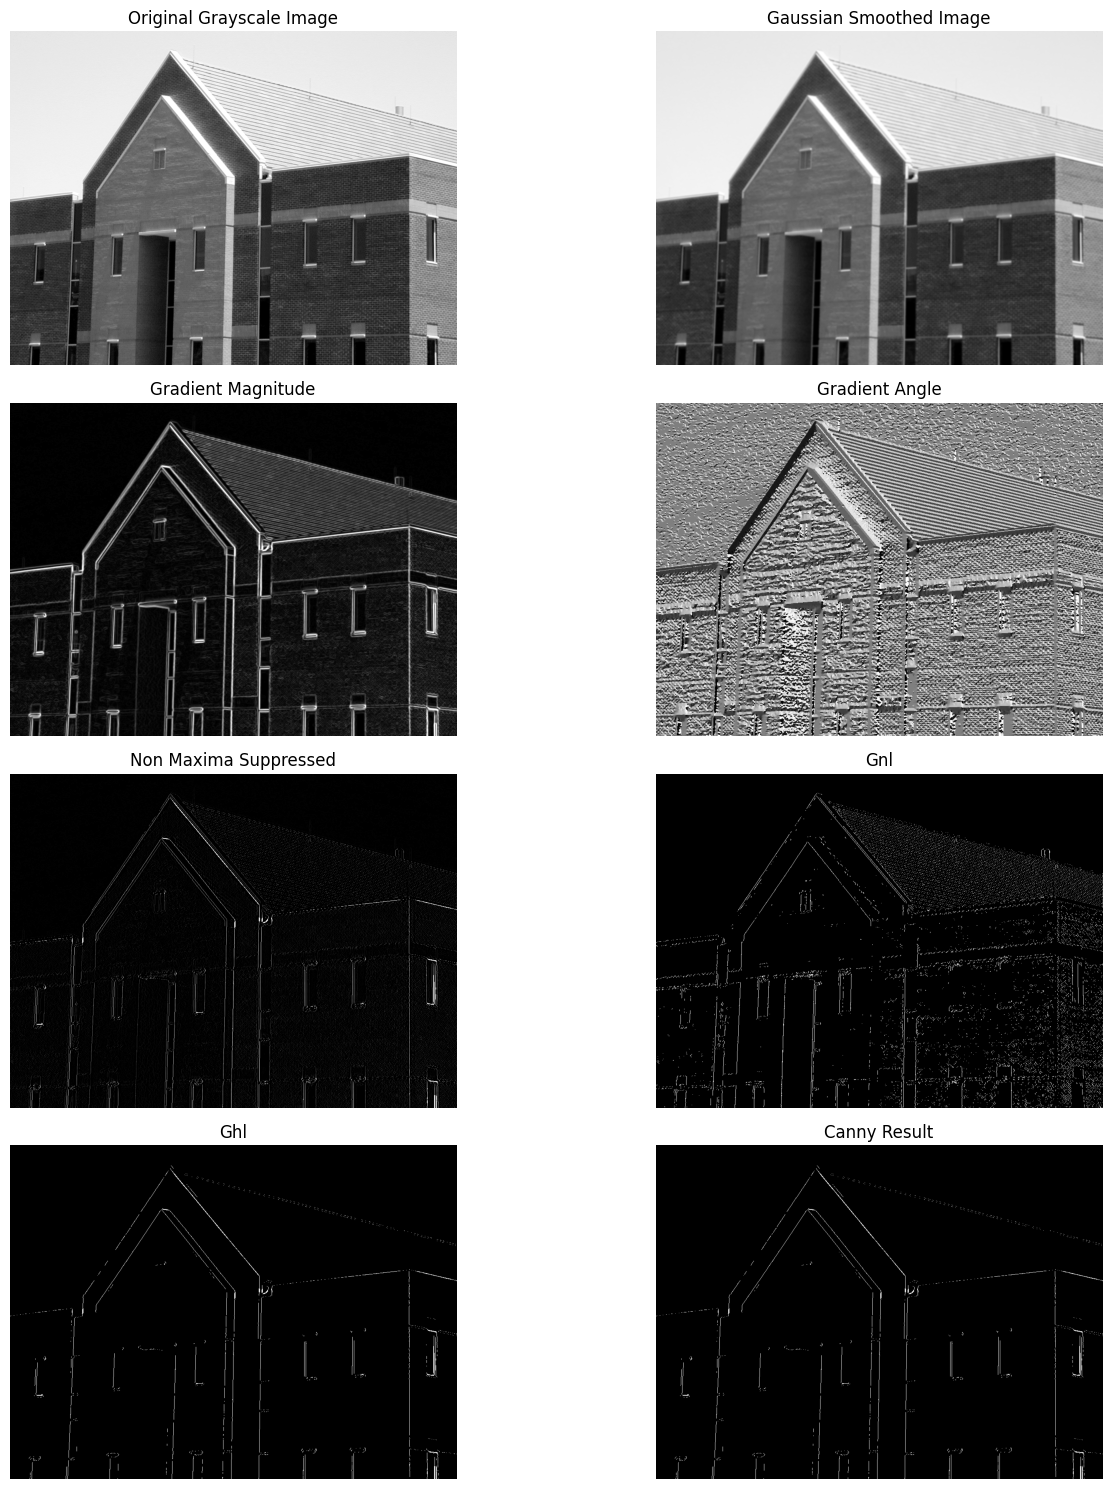

In [40]:
plt.figure(figsize=(15, 15))

nrows,ncols = 4,2

plt.subplot(nrows, ncols, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(nrows, ncols, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Gaussian Smoothed Image')
plt.axis('off')

plt.subplot(nrows, ncols, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(nrows, ncols, 4)
plt.imshow(sobel_angle, cmap='gray')
plt.title('Gradient Angle')
plt.axis('off')

plt.subplot(nrows, ncols, 5)
plt.imshow(nonmaxima_suppress, cmap='gray')
plt.title('Non Maxima Suppressed')
plt.axis('off')

plt.subplot(nrows, ncols, 6)
plt.imshow(Gnl, cmap='gray')
plt.title('Gnl')
plt.axis('off')

plt.subplot(nrows, ncols, 7)
plt.imshow(Ghl, cmap='gray')
plt.title('Ghl')
plt.axis('off')

plt.subplot(nrows, ncols, 8)
plt.imshow(Ghl, cmap='gray')
plt.title('Canny Result')
plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
import os

# Create a folder to save the images
output_folder = 'output_images'
os.makedirs(output_folder, exist_ok=True)

# Save each image
plt.imsave(os.path.join(output_folder, '1_gray_image.png'), gray_image, cmap='gray')
plt.imsave(os.path.join(output_folder, '2_smoothed_image.png'), smoothed_image, cmap='gray')
plt.imsave(os.path.join(output_folder, '3_gradient_magnitude.png'), sobel_magnitude, cmap='gray')
plt.imsave(os.path.join(output_folder, '4_gradient_angle.png'), sobel_angle, cmap='gray')
plt.imsave(os.path.join(output_folder, '5_non_maxima_suppressed.png'), nonmaxima_suppress, cmap='gray')
plt.imsave(os.path.join(output_folder, '6_gnl.png'), Gnl, cmap='gray')
plt.imsave(os.path.join(output_folder, '7_ghl.png'), Ghl, cmap='gray')
plt.imsave(os.path.join(output_folder, '8_canny_result.png'), Ghl, cmap='gray')

print(f"Images successfully saved in '{output_folder}' folder.")

Images successfully saved in 'output_images' folder.
